In [1]:
#Firstly, I would present you some information we could extract easily from the data at hand, and afterwards I would 
#use ML to extract information from these data, and than I would asnwer some questions
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import ensemble
import pylab as pl

In [2]:
#reading data
dr = pd.read_csv("HR_comma_sep.csv")

#printing the head
print(dr.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4 

In [3]:
#let`s look at some statistics about satisfaction_level
avg_satisfaction = np.mean(dr['satisfaction_level'])
med_satisfaction = np.median(dr['satisfaction_level'])
std_satisfaction = np.std(dr['satisfaction_level'])
print(" Avg satisfaction is ",avg_satisfaction)
print(" Median satisfaction is ",med_satisfaction)
print(" Std is ",std_satisfaction)

 Avg satisfaction is  0.6128335222348166
 Median satisfaction is  0.64
 Std is  0.24862236268207252


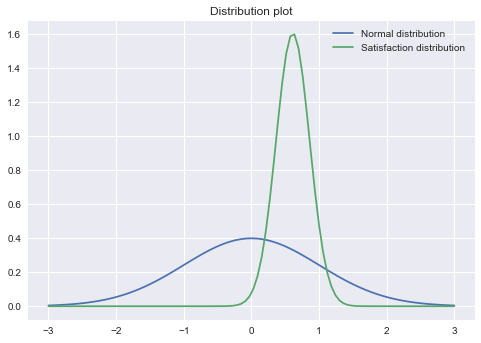

The difference in information between the 2 distributions is  0.325263079485  bits


In [4]:
#How much information is contained in this distribution compared to the normal distribution?
#I construct the normal distribution first:
x = 0 + 1 * np.random.rand(1000) # the Gaussian distribution with 0 mean and 1 std

#I construct the approximate distribution given by the date before:
y = avg_satisfaction + std_satisfaction * np.random.rand(1000) # the Gaussian that approximates my data

#Lets compare both to see what differences of information does appear
difference_info = scipy.stats.entropy(y,x)

plt.plot(np.linspace(-3,3,100),mlab.normpdf(np.linspace(-3,3,100),0,1)) #the gaussian 
plt.plot(np.linspace(-3,3,100),mlab.normpdf(np.linspace(-3,3,100),avg_satisfaction,std_satisfaction)) #the approx distribution 
plt.legend(['Normal distribution','Satisfaction distribution'])
plt.title('Distribution plot')
plt.show()

#Print
print("The difference in information between the 2 distributions is ",difference_info," bits")

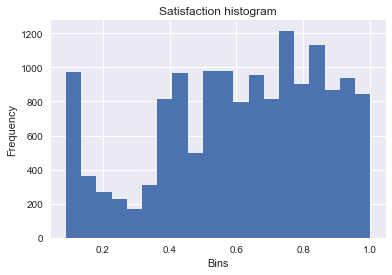

In [5]:
#ploting a histogram
%matplotlib inline
plt.hist(dr['satisfaction_level'],bins=20)
plt.title('Satisfaction histogram')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.show()


In [6]:
#How many people are more than 80% satisfied?
print(len(dr[dr['satisfaction_level'] >= 0.8])/len(dr)*100,"%")

28.16187745849723 %


In [7]:
#How work hours is related to the satisfaction levels?
print(scipy.stats.stats.pearsonr(dr['satisfaction_level'],dr['average_montly_hours'])[0])
#It can be seen they are not correlated

-0.0200481132195


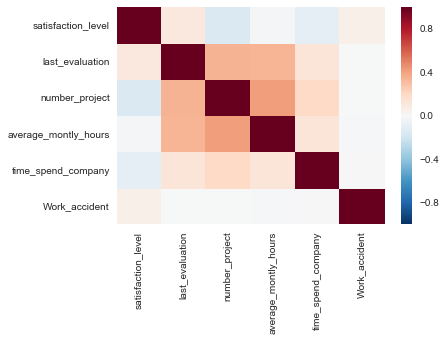

In [8]:
#Would you show me the Person`s heatmap to see how things correlate?
date = (dr[dr.columns[:6]])
corr = date.corr()
sns.heatmap(corr)
plt.show()

#It can be seen that the majority of crosscorrelation is with by last_evaluation,number_project 
#and average_montly_hours

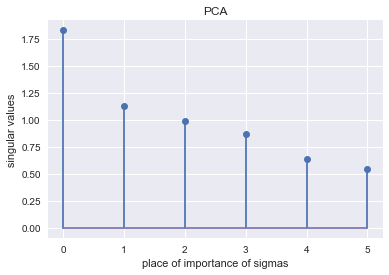

In [9]:
#What are the most influential features?
#We will use PCA to find out
U,S,V = np.linalg.svd(corr.values)
plt.stem(S)
plt.ylabel('singular values')
plt.xlabel('place of importance of sigmas')
plt.title('PCA')
plt.show()

In [10]:
#What are the profession within our data?
print(dr['sales'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


In [11]:
#Which is the most happy profession?
a = dr.groupby(['sales'])['satisfaction_level'].mean()
print(a)


sales
IT             0.618142
RandD          0.619822
accounting     0.582151
hr             0.598809
management     0.621349
marketing      0.618601
product_mng    0.619634
sales          0.614447
support        0.618300
technical      0.607897
Name: satisfaction_level, dtype: float64


In [12]:
#We can see each profession summary
print((dr.groupby(['sales']).mean()))

             satisfaction_level  last_evaluation  number_project  \
sales                                                              
IT                     0.618142         0.716830        3.816626   
RandD                  0.619822         0.712122        3.853875   
accounting             0.582151         0.717718        3.825293   
hr                     0.598809         0.708850        3.654939   
management             0.621349         0.724000        3.860317   
marketing              0.618601         0.715886        3.687646   
product_mng            0.619634         0.714756        3.807095   
sales                  0.614447         0.709717        3.776329   
support                0.618300         0.723109        3.803948   
technical              0.607897         0.721099        3.877941   

             average_montly_hours  time_spend_company  Work_accident  \
sales                                                                  
IT                     202.215974      

In [13]:
#We can see the management is the most happy
print((dr.groupby(['sales']).mean()).max())

satisfaction_level         0.621349
last_evaluation            0.724000
number_project             3.877941
average_montly_hours     202.497426
time_spend_company         4.303175
Work_accident              0.170267
left                       0.290934
promotion_last_5years      0.109524
dtype: float64


In [14]:
#Which is the least happy profession?
print((dr.groupby(['sales']).mean()).min())
#The accounting is the most disliked profession

satisfaction_level         0.582151
last_evaluation            0.708850
number_project             3.654939
average_montly_hours     198.684709
time_spend_company         3.355886
Work_accident              0.120433
left                       0.144444
promotion_last_5years      0.000000
dtype: float64


In [15]:
#See what rules will work to find the employees that will leave the job?
print((dr.columns.values))

['satisfaction_level' 'last_evaluation' 'number_project'
 'average_montly_hours' 'time_spend_company' 'Work_accident' 'left'
 'promotion_last_5years' 'sales' 'salary']


In [16]:
# Split data
Y_train, Y_test = train_test_split(dr['left'],test_size=0.33,random_state=0)
column_list = dr.columns[:6] # using just those columns from all
X_train, X_test = train_test_split(dr.columns[:6],test_size = 0.33,random_state = 0)

# Preprocess X_train and X_test because they are a list 
X_train, X_test = train_test_split(dr[X_train.values],test_size = 0.33,random_state=0)

# Create the Tree Classifier
clf = tree.DecisionTreeClassifier(random_state=0,max_depth=3,criterion='gini')
clf.fit(X_train,Y_train)

# Exporting the tree for visualization purposes
tree.export_graphviz(clf,out_file='tree_ipynbk.dot',feature_names=(dr.columns[:6]))


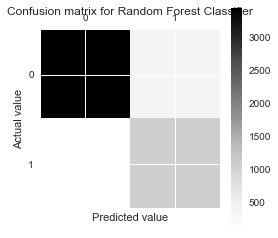

[[3448  370]
 [  74 1058]]


In [17]:
a = confusion_matrix(y_true=Y_test,y_pred=clf.predict(X_test))
pl.matshow(a)
pl.colorbar()
pl.title('Confusion matrix for Random Forest Classifier')
pl.xlabel('Predicted value')
pl.ylabel('Actual value')
pl.show()
print(a)

In [18]:
# Predict and see how good is our predictor
print("The accuracy is ",accuracy_score(y_true=Y_test,y_pred=clf.predict(X_test)) *100, "%")

The accuracy is  91.0303030303 %


In [19]:
# Let us now use random forests to see if we could improve the accuracy of our prediction
clf2 = ensemble.RandomForestClassifier(n_estimators=50,max_depth=3)
clf2.fit(X_train,Y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [20]:
print("The accuracy is ",accuracy_score(y_true=Y_test,y_pred=clf2.predict(X_test)) *100, "%")

The accuracy is  91.0303030303 %


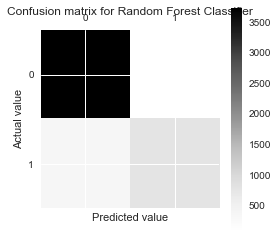

[[3733   85]
 [ 359  773]]


In [21]:
# Let`s see the confusion matrix for both classifiers
a = confusion_matrix(y_true=Y_test,y_pred=clf2.predict(X_test))
pl.matshow(a)
pl.colorbar()
pl.title('Confusion matrix for Random Forest Classifier')
pl.xlabel('Predicted value')
pl.ylabel('Actual value')
pl.show()
print(a)

In [22]:
# We can see that Random forest algorithm is slighly better than a simple decision tree
clf3 = ensemble.AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=3),n_estimators=50,learning_rate=0.81)
clf3.fit(X_train,Y_train)


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=0.81, n_estimators=50, random_state=None)

In [23]:
print("The accuracy is ",accuracy_score(y_true=Y_test,y_pred=clf3.predict(X_test)) *100, "%")

The accuracy is  97.4545454545 %


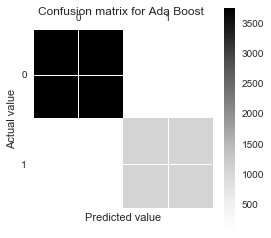

[[3762   56]
 [  70 1062]]


In [24]:
# Let`s see the confusion matrix for both classifiers
a = confusion_matrix(y_true=Y_test,y_pred=clf3.predict(X_test))
pl.matshow(a)
pl.colorbar()
pl.title('Confusion matrix for Ada Boost ')
pl.xlabel('Predicted value')
pl.ylabel('Actual value')
pl.show()
print(a)

In [25]:
# Now, we can see that AdaBoost made a significant improvement compared to Random Forest Algo. Moreover the Confussion 
# matrix looks much better, meaning the misclassification rate is lower than in any other classifiers. In conclusion we
# can predict with 97% accuracy if a certain employee would leave the company or not, based only on 6 features (all of
# which seems to be important as expressed in PCA analysis)